Dimensionality reduction is a technique used to `reduce the number of features in a dataset` while retaining as much information as possible. This can help simplify models, reduce computation time, and improve visualization.

In this notebook, we will explore three dimensionality reduction techniques:

1. **Principal Component Analysis (PCA)**
2. **Linear Discriminant Analysis (LDA)**
3. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

We will use the Iris dataset for example.


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [14]:
import pandas as pd
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [15]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


**PCA** (Principal Component Analysis) is a technique used to simplify complex data. It helps to reduce the number of features in your dataset while keeping the important information. This is especially useful when you have a lot of features and want to make the data easier to work with.

### How PCA Works

1. **Start with Complex Data**:
   - We might have a dataset with many features (like height, weight, age, etc.). PCA helps to simplify this data.

2. **Find Important Directions**:
   - PCA looks for patterns in the data and finds the directions (or axes) where the data varies the most. These directions are called **principal components**.

3. **Create New Features**:
   - It creates new features (principal components) that are combinations of the original features. The first principal component captures the most variation, the second captures the next most, and so on.

4. **Reduce Dimensions**:
   - You can use only the most important principal components to represent your data. This means you can reduce the number of features while still keeping most of the important information.

### Why Use PCA?

- **Simplifies Data**: Reduces the number of features, making the data easier to work with.
- **Improves Visualization**: Helps in visualizing complex data in 2D or 3D by reducing it to fewer dimensions.
- **Removes Redundancy**: Combines features that are similar, so you don't have redundant or correlated features.

### Example

Imagine we have a dataset with 100 features. PCA can reduce these 100 features to just 2 or 3 key features that still capture most of the important information. This makes it easier to analyze and visualize the data.


PCA is a tool that simplifies data by reducing the number of features while keeping the most important information. It helps to make complex datasets more manageable and easier to understand.


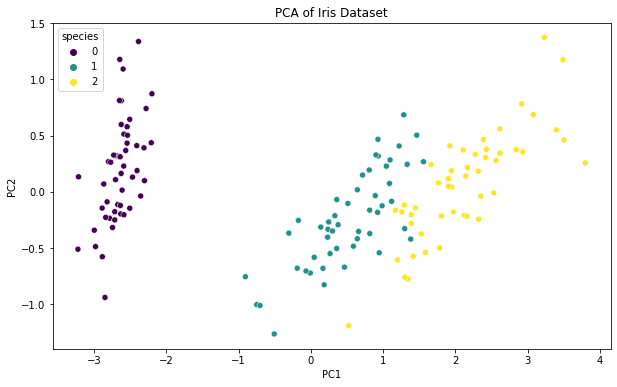

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()


**LDA** (Linear Discriminant Analysis) is a technique used in machine learning and statistics for dimensionality reduction and classification. It aims to find a linear combination of features that best separates different classes in a dataset. Unlike PCA (Principal Component Analysis), which focuses on maximizing variance, LDA focuses on maximizing the separation between classes.

### Key Concepts of LDA

1. **Class Separation**:
   - LDA finds directions (linear discriminants) that maximize the separation between different classes. It projects data onto a lower-dimensional space where the classes are most distinct.

2. **Dimensionality Reduction**:
   - Similar to PCA, LDA can reduce the number of features. However, LDA reduces dimensions by focusing on class separability rather than capturing variance.

3. **Linear Discriminants**:
   - These are the new features created by LDA. They are linear combinations of the original features that maximize the distance between the means of different classes while minimizing the spread within each class.

### How LDA Works

1. **Compute the Mean Vectors**:
   - Calculate the mean of each class in the feature space.

2. **Compute the Scatter Matrices**:
   - **Within-Class Scatter Matrix**: Measures how much the data points within each class scatter around their mean.
   - **Between-Class Scatter Matrix**: Measures how much the class means scatter around the overall mean.

3. **Solve the Generalized Eigenvalue Problem**:
   - Find eigenvectors and eigenvalues from the scatter matrices. The eigenvectors corresponding to the largest eigenvalues represent the directions that maximize class separation.

4. **Select the Top Components**:
   - Choose the eigenvectors (linear discriminants) that correspond to the largest eigenvalues to form the new feature space.

5. **Transform the Data**:
   - Project the original data onto the new space defined by the selected linear discriminants.

### Advantages of LDA

- **Improves Classification Performance**: By maximizing the separation between classes, LDA often improves the accuracy of classifiers.
- **Reduces Dimensionality**: Helps to reduce the number of features, making the data easier to manage and analyze.
- **Works Well for Linearly Separable Data**: LDA is effective when classes can be separated by a linear boundary.

### Example Use Case

Imagine we have a dataset with features about patients, and we want to classify them into different categories based on disease types. LDA can help us reduce the number of features while ensuring that the categories are well-separated, improving the performance of classification algorithms.



LDA is a technique used for both dimensionality reduction and classification. It finds linear combinations of features that best separate different classes, making it useful for tasks where distinguishing between categories is important.


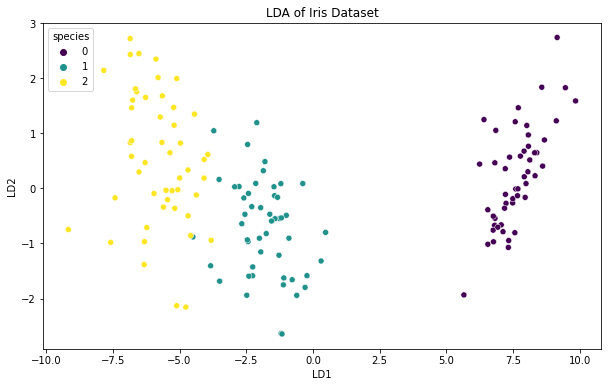

In [17]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

df_lda = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
df_lda['species'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='species', data=df_lda, palette='viridis')
plt.title('LDA of Iris Dataset')
plt.show()


**t-SNE** (t-Distributed Stochastic Neighbor Embedding) is a technique used for visualizing high-dimensional data in a lower-dimensional space, usually 2D or 3D. It's especially useful when you have complex data with many features and want to explore and understand the underlying patterns or structure in the data.

### Key Concepts of t-SNE

1. **High-Dimensional Data**:
   - t-SNE helps to take data with many features (dimensions) and represent it in 2D or 3D space.

2. **Preserving Similarities**:
   - The goal of t-SNE is to keep similar data points close together and dissimilar points far apart in the lower-dimensional space. It tries to preserve the local structure of the data, so clusters of similar points remain close together.

3. **Probability Distributions**:
   - In the original high-dimensional space, t-SNE calculates probabilities that represent how likely it is that one point would be a neighbor of another. It then does the same for the lower-dimensional space. The algorithm tries to make these probabilities as similar as possible in both spaces.

4. **Cost Function**:
   - t-SNE uses a cost function (often a Kullback-Leibler divergence) to measure how well the lower-dimensional representation matches the original high-dimensional distribution. It iteratively adjusts the positions of points to minimize this cost.

### How t-SNE Works

1. **Calculate Pairwise Similarities**:
   - Compute how similar each data point is to every other data point in the high-dimensional space using probabilities.

2. **Initialize the Low-Dimensional Space**:
   - Start with a random arrangement of points in the lower-dimensional space (e.g., 2D or 3D).

3. **Adjust Points to Preserve Similarities**:
   - Iteratively adjust the positions of the points in the lower-dimensional space to make the pairwise similarities as close as possible to those in the high-dimensional space.

4. **Visualize**:
   - Once the algorithm converges, the final 2D or 3D positions of the points can be plotted to visualize the data.

### Advantages of t-SNE

- **Handles Non-Linear Relationships**: Unlike PCA, which is a linear method, t-SNE can capture non-linear relationships in the data.
- **Effective for Visualization**: Produces clear and interpretable visualizations of complex datasets.

### Example Use Case

Suppose we have a dataset of images of handwritten digits, and we want to see how similar the digits are to each other. t-SNE can reduce the dimensions of these images from high-dimensional space to 2D, allowing us to visualize clusters of similar digits and see how they relate to each other.



`t-SNE` is a powerful technique for visualizing high-dimensional data by mapping it to a lower-dimensional space while preserving the structure and relationships between data points. It’s particularly useful for exploring and understanding complex datasets.


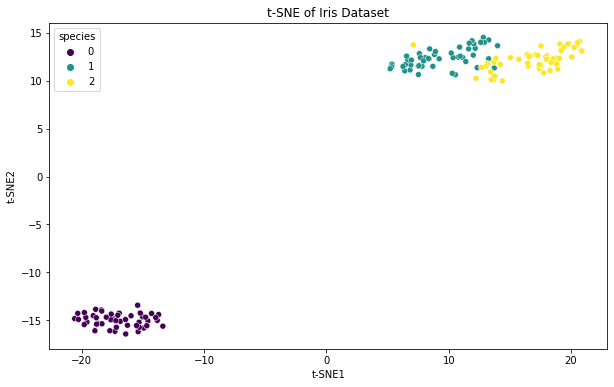

In [18]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['species'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='species', data=df_tsne, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()
